In [425]:
import pandas as pd
import numpy as np

In [426]:
# Importing the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [427]:
X_train = train_data.iloc[:, :-1].values
X_test = test_data.iloc[:, :].values
y_train = train_data.iloc[:, -1].values

X= np.concatenate((X_train, X_test), axis=0)
y= np.concatenate((y_train, np.full(X_test.shape[0], np.nan, dtype=object)), axis=0)

In [428]:
# Find null values in the dataset
print(train_data.isnull().sum())
print(test_data.isnull().sum())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [429]:
print(X)
print(y)

[['LP001002' 'Male' 'No' ... 360.0 1.0 'Urban']
 ['LP001003' 'Male' 'Yes' ... 360.0 1.0 'Rural']
 ['LP001005' 'Male' 'Yes' ... 360.0 1.0 'Urban']
 ...
 ['LP002980' 'Male' 'No' ... 360.0 nan 'Semiurban']
 ['LP002986' 'Male' 'Yes' ... 360.0 1.0 'Rural']
 ['LP002989' 'Male' 'No' ... 180.0 1.0 'Rural']]
['Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N'
 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' '

In [430]:
print('\nInfo of numeric columns: ')
print(train_data.describe())

print('\nCount of null values in each column:')
print(train_data.isnull().sum())


Info of numeric columns: 
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  

Count of null values in each column:
Loan_ID               0
Gender             

In [431]:
# dropping usnused columns
X = np.delete(X,[0], axis=1)
print('\nData after dropping columns:')
print(X)


Data after dropping columns:
[['Male' 'No' '0' ... 360.0 1.0 'Urban']
 ['Male' 'Yes' '1' ... 360.0 1.0 'Rural']
 ['Male' 'Yes' '0' ... 360.0 1.0 'Urban']
 ...
 ['Male' 'No' '0' ... 360.0 nan 'Semiurban']
 ['Male' 'Yes' '0' ... 360.0 1.0 'Rural']
 ['Male' 'No' '0' ... 180.0 1.0 'Rural']]


In [432]:
# give names to columns in X
columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
           'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
           'Loan_Amount_Term', 'Credit_History', 'Property_Area']
X = pd.DataFrame(X, columns=columns)

In [433]:
# Filling missing values with most_frequent / mean
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

simpleimputer_mf= SimpleImputer(missing_values=np.nan, strategy='most_frequent')
simpleimputer_mean= SimpleImputer(missing_values=np.nan, strategy='mean')

simpleimputer_mf.fit(X.loc[:, 'Gender':'Self_Employed'])
X.loc[:, 'Gender':'Self_Employed'] = simpleimputer_mf.transform(X.loc[:, 'Gender':'Self_Employed'])

simpleimputer_mean.fit(X.loc[:, 'ApplicantIncome':'Loan_Amount_Term'])
X.loc[:, 'ApplicantIncome':'Loan_Amount_Term'] = simpleimputer_mean.transform(X.loc[:, 'ApplicantIncome':'Loan_Amount_Term'])

simpleimputer_mf.fit(X.loc[:, 'Credit_History':'Property_Area'])
X.loc[:, 'Credit_History':'Property_Area'] = simpleimputer_mf.transform(X.loc[:, 'Credit_History':'Property_Area'])

In [434]:
# Converting all categorical variables into numeric by encoding the categories
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
lableencoder = LabelEncoder()
for i in var_mod:
    X[i] = lableencoder.fit_transform(X[i])
print(X.dtypes)

Gender                int32
Married               int32
Dependents            int32
Education             int32
Self_Employed         int32
ApplicantIncome      object
CoapplicantIncome    object
LoanAmount           object
Loan_Amount_Term     object
Credit_History        int32
Property_Area         int32
dtype: object


In [435]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[:len(y_train)], y[:len(y_train)], test_size=0.3, random_state=0)


In [436]:
# Logistic Regression
# Feature Scaling
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
X_train = standardscaler.fit_transform(X_train)
X_test = standardscaler.transform(X_test)

# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [437]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [438]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# calculating accuracy
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

[[ 22  29]
 [  2 132]]
Accuracy: 83.24%


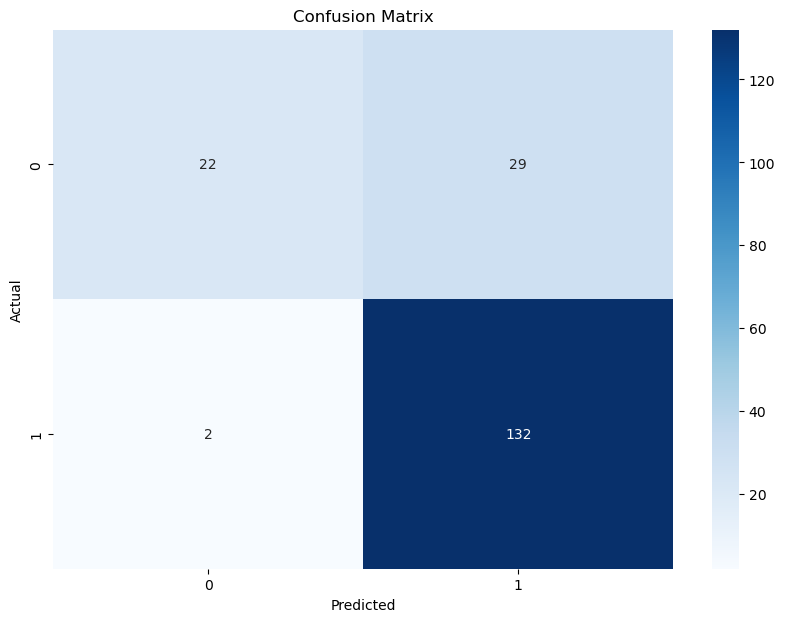

In [439]:
# Visualising the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [440]:
# filling nan values in y with predicted values
y[len(y_train):] = classifier.predict(X[len(y_train):])


c:\Users\majoo\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [441]:
#Saving the final dataset
X['Loan_Status'] = y
X.to_csv('final_dataset.csv', index=False)